# Web Mining Final Project
## Name: Venkatesh Kunduru
### Title - Indian Premiere League Teams Performance
**Question -** &nbsp; Calculating, which team is having more Won and Lost Percentage in the Indian Premiere League ?  
  
**Answer -** The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by different teams representing different cities in India. By gathering the data from the cricbuzz website, calculated the win, lose and tie percentages. In addition to the calculations, I represented the results in visualization format like bar-chart.  
  
**Data collection -** &nbsp; I collected the data from cricbuzz website using Beautiful Soup, for each season starting from 2011 to 2019, I collected the points table data and store the data in the form of python dictionaries.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**The project code is divided into different snippets:**  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1. In the first snippet, I gathered the all the seasons points table information and stored in python dictionary and also calculated how many matches &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;they played totally?, how many matches they won from the played matches? and how many matches they lost from the played matches?.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2. In the second snippet, from the 1st snippet result calculated the win, lose and tie percentages of each team. 
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3. From the third snippet, I started visualizing the data and showing individual won, lost and tie percentages bar-graphs. In this snippet, I showed &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the visualization for won percentage and including number of matches they played and number of matches they won.   
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4. In the forth snippet, I showed the visualization for lose percentage and including number of matches they played and number of matches they &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;lost.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5. In the fifth snippet, I showed the visualization for tie percentage.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6. In the last snippet, I showed the final result combining all the three charts to one chart.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For visualizing the data, I used **matplotlib.pyplot** and **numpy** modules. These modules are used to draw the charts in a appropriate way. For styling the charts, I used **matplotlib.style** module.
  
### Conclusion
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; From the result I conclude that, Chennai Super Kings is having more winning percentage of (62.75%) followed by Mumbai Indians having (59.23%). Pune Warriors is the most losing team in the IPL history with (71.74%) followed by Deccan Chargers having (63.33). Raising Pune Supergaint, Kings XI Punjab, Rajasthan Royals were maintaining constant performance. 
  
### Below cells shows the easy understanding of project in the form of snippets. In these jupyter file, I am showing all the four charts, but in python file showing only the final result chart.


In [7]:
# 1st snippet
def switch_demo(argument):
    switcher = {
        2011: "https://www.cricbuzz.com/cricket-series/2037/indian-premier-league-2011/points-table",
        2012: "https://www.cricbuzz.com/cricket-series/2115/indian-premier-league-2012/points-table",
        2013: "https://www.cricbuzz.com/cricket-series/2170/indian-premier-league-2013/points-table",
        2014: "https://www.cricbuzz.com/cricket-series/2261/indian-premier-league-2014/points-table",
        2015: "https://www.cricbuzz.com/cricket-series/2330/indian-premier-league-2015/points-table",
        2016: "https://www.cricbuzz.com/cricket-series/2430/indian-premier-league-2016/points-table",
        2017: "https://www.cricbuzz.com/cricket-series/2568/indian-premier-league-2017/points-table",
        2018: "https://www.cricbuzz.com/cricket-series/2676/indian-premier-league-2018/points-table",
        2019: "https://www.cricbuzz.com/cricket-series/2810/indian-premier-league-2019/points-table"
    }
    return switcher.get(argument, "nothing") 

import requests
from bs4 import BeautifulSoup

pune_match_count = pune_win_count = pune_loss_count =0
kochi_match_count = kochi_win_count = kochi_loss_count =0
mumbai_match_count = mumbai_win_count = mumbai_loss_count = 0
csk_match_count = csk_win_count = csk_loss_count = 0
deccan_match_count = deccan_win_count = deccan_loss_count = 0
rr_match_count = rr_win_count = rr_loss_count = 0
rising_match_count = rising_win_count = rising_loss_count = 0
rcb_match_count = rcb_win_count =rcb_loss_count = 0
punjab_match_count = punjab_win_count = punjab_loss_count = 0
gujarat_match_count = gujarat_win_count = gujarat_loss_count = 0
kkr_match_count = kkr_win_count = kkr_loss_count = 0
delhi_match_count = delhi_win_count = delhi_loss_count = 0
srh_match_count = srh_win_count = srh_loss_count = 0


all_teams = list()
total_info_dict = dict()

for year in range(2011,2020):
    #print(switch_demo(year))
    #print('\n' + str(year) + '\n')
    URL = switch_demo(year)
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, 'html5lib')
    table = soup.find('table', {'class':'table cb-srs-pnts'})
    table_body = table.find('tbody')
    team_titles = table_body.find_all('a', {'class':'cb-text-link', 'title':''})
    title = list() # storing the team titles in the list
    for title1 in team_titles:
        title.append(title1.text)
        all_teams.append(title1.text)
    #print(title)
    #print(table_body.prettify())
    data =[]
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td', {'class':'cb-srs-pnts-td'})
        data.append([ele.text for ele in cols])
    
    points_data = list(i for i in data if i!=[])

    points_dict = {}
    for i in range(len(title)):
        points_dict.update({title[i]:points_data[i]})
    #print(points_dict)
    # storing the win and loss dictionaries
    win_dict = {}
    loss_dict = {}
    matches_played_dict = {}
    for i in range(len(points_dict)):
        matches_played_dict.update({title[i]:points_data[i][0]})
        win_dict.update({title[i]:points_data[i][1]})
        loss_dict.update({title[i]:points_data[i][2]})
    #print(matches_played_dict)
    #print(win_dict)
    #print(loss_dict)
    #rcb_match_count += int(matches_played_dict['Pune Warriors'])
    if 'Pune Warriors' in matches_played_dict:
        pune_match_count += int(matches_played_dict['Pune Warriors'])
        pune_win_count += int(win_dict['Pune Warriors'])
        pune_loss_count += int(loss_dict['Pune Warriors'])
        total_info_dict.update({'Pune Warriors':[pune_match_count, pune_win_count, pune_loss_count]})
    if 'Kochi Tuskers Kerala' in matches_played_dict:
        kochi_match_count += int(matches_played_dict['Kochi Tuskers Kerala'])
        kochi_win_count += int(win_dict['Kochi Tuskers Kerala'])
        kochi_loss_count += int(loss_dict['Kochi Tuskers Kerala'])
        total_info_dict.update({'Kochi Tuskers Kerala':[kochi_match_count, kochi_win_count, kochi_loss_count]})
    if 'Mumbai Indians' in matches_played_dict:
        mumbai_match_count += int(matches_played_dict['Mumbai Indians'])
        mumbai_win_count += int(win_dict['Mumbai Indians'])
        mumbai_loss_count += int(loss_dict['Mumbai Indians'])
        total_info_dict.update({'Mumbai Indians':[mumbai_match_count, mumbai_win_count, mumbai_loss_count]})
    if 'Chennai Super Kings' in matches_played_dict:
        csk_match_count += int(matches_played_dict['Chennai Super Kings'])
        csk_win_count += int(win_dict['Chennai Super Kings'])
        csk_loss_count += int(loss_dict['Chennai Super Kings'])
        total_info_dict.update({'Chennai Super Kings':[csk_match_count, csk_win_count, csk_loss_count]})
    if 'Deccan Chargers' in matches_played_dict:
        deccan_match_count += int(matches_played_dict['Deccan Chargers'])
        deccan_win_count += int(win_dict['Deccan Chargers'])
        deccan_loss_count += int(loss_dict['Deccan Chargers'])
        total_info_dict.update({'Deccan Chargers':[deccan_match_count, deccan_win_count, deccan_loss_count]})
    if 'Rajasthan Royals' in matches_played_dict:
        rr_match_count += int(matches_played_dict['Rajasthan Royals'])
        rr_win_count += int(win_dict['Rajasthan Royals'])
        rr_loss_count += int(loss_dict['Rajasthan Royals'])
        total_info_dict.update({'Rajasthan Royals':[rr_match_count, rr_win_count, rr_loss_count]})
    if 'Rising Pune Supergiant' in matches_played_dict:
        rising_match_count += int(matches_played_dict['Rising Pune Supergiant'])
        rising_win_count += int(win_dict['Rising Pune Supergiant'])
        rising_loss_count += int(loss_dict['Rising Pune Supergiant'])
        total_info_dict.update({'Rising Pune Supergiant':[rising_match_count, rising_win_count, rising_loss_count]})
    if 'Royal Challengers Bangalore' in matches_played_dict:
        rcb_match_count += int(matches_played_dict['Royal Challengers Bangalore'])
        rcb_win_count += int(win_dict['Royal Challengers Bangalore'])
        rcb_loss_count += int(loss_dict['Royal Challengers Bangalore'])
        total_info_dict.update({'Royal Challengers Bangalore':[rcb_match_count, rcb_win_count, rcb_loss_count]})
    if 'Kings XI Punjab' in matches_played_dict:
        punjab_match_count += int(matches_played_dict['Kings XI Punjab'])
        punjab_win_count += int(win_dict['Kings XI Punjab'])
        punjab_loss_count += int(loss_dict['Kings XI Punjab'])
        total_info_dict.update({'Kings XI Punjab':[punjab_match_count, punjab_win_count, punjab_loss_count]})
    if 'Gujarat Lions' in matches_played_dict:
        gujarat_match_count += int(matches_played_dict['Gujarat Lions'])
        gujarat_win_count += int(win_dict['Gujarat Lions'])
        gujarat_loss_count += int(loss_dict['Gujarat Lions'])
        total_info_dict.update({'Gujarat Lions':[gujarat_match_count, gujarat_win_count, gujarat_loss_count]})
    if 'Kolkata Knight Riders' in matches_played_dict:
        kkr_match_count += int(matches_played_dict['Kolkata Knight Riders'])
        kkr_win_count += int(win_dict['Kolkata Knight Riders'])
        kkr_loss_count += int(loss_dict['Kolkata Knight Riders'])
        total_info_dict.update({'Kolkata Knight Riders':[kkr_match_count, kkr_win_count, kkr_loss_count]})
    if 'Delhi Capitals' in matches_played_dict:
        delhi_match_count += int(matches_played_dict['Delhi Capitals'])
        delhi_win_count += int(win_dict['Delhi Capitals'])
        delhi_loss_count += int(loss_dict['Delhi Capitals'])
        total_info_dict.update({'Delhi Capitals':[delhi_match_count, delhi_win_count, delhi_loss_count]})
    if 'Sunrisers Hyderabad' in matches_played_dict:
        srh_match_count += int(matches_played_dict['Sunrisers Hyderabad'])
        srh_win_count += int(win_dict['Sunrisers Hyderabad'])
        srh_loss_count += int(loss_dict['Sunrisers Hyderabad'])
        total_info_dict.update({'Sunrisers Hyderabad':[srh_match_count, srh_win_count, srh_loss_count]})
    
        

print()
print(total_info_dict)


{'Pune Warriors': [46, 12, 33], 'Kochi Tuskers Kerala': [14, 6, 8], 'Mumbai Indians': [130, 77, 53], 'Chennai Super Kings': [102, 64, 37], 'Deccan Chargers': [30, 10, 19], 'Rajasthan Royals': [102, 49, 49], 'Royal Challengers Bangalore': [130, 60, 64], 'Kings XI Punjab': [130, 60, 70], 'Kolkata Knight Riders': [130, 70, 58], 'Delhi Capitals': [130, 52, 76], 'Sunrisers Hyderabad': [100, 54, 45], 'Rising Pune Supergiant': [28, 14, 14], 'Gujarat Lions': [28, 13, 15]}


In [8]:
# 2nd snippet
# win and lose percentage
win_percent = dict()
lose_percent = dict()
tie_percent = dict()
for i in (total_info_dict):
    win_percent[i] = round((total_info_dict[i][1]/total_info_dict[i][0]) * 100, 2)
    lose_percent[i] = round((total_info_dict[i][2]/total_info_dict[i][0]) * 100, 2)
    tie_percent[i] = round(100 - win_percent[i] - lose_percent[i], 2)
print(win_percent)
print()
print(lose_percent)
print()
print(tie_percent)

{'Pune Warriors': 26.09, 'Kochi Tuskers Kerala': 42.86, 'Mumbai Indians': 59.23, 'Chennai Super Kings': 62.75, 'Deccan Chargers': 33.33, 'Rajasthan Royals': 48.04, 'Royal Challengers Bangalore': 46.15, 'Kings XI Punjab': 46.15, 'Kolkata Knight Riders': 53.85, 'Delhi Capitals': 40.0, 'Sunrisers Hyderabad': 54.0, 'Rising Pune Supergiant': 50.0, 'Gujarat Lions': 46.43}

{'Pune Warriors': 71.74, 'Kochi Tuskers Kerala': 57.14, 'Mumbai Indians': 40.77, 'Chennai Super Kings': 36.27, 'Deccan Chargers': 63.33, 'Rajasthan Royals': 48.04, 'Royal Challengers Bangalore': 49.23, 'Kings XI Punjab': 53.85, 'Kolkata Knight Riders': 44.62, 'Delhi Capitals': 58.46, 'Sunrisers Hyderabad': 45.0, 'Rising Pune Supergiant': 50.0, 'Gujarat Lions': 53.57}

{'Pune Warriors': 2.17, 'Kochi Tuskers Kerala': 0.0, 'Mumbai Indians': 0.0, 'Chennai Super Kings': 0.98, 'Deccan Chargers': 3.34, 'Rajasthan Royals': 3.92, 'Royal Challengers Bangalore': 4.62, 'Kings XI Punjab': 0.0, 'Kolkata Knight Riders': 1.53, 'Delhi Capi

('Pune Warriors', 'Kochi Tuskers Kerala', 'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers', 'Rajasthan Royals', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Capitals', 'Sunrisers Hyderabad', 'Rising Pune Supergiant', 'Gujarat Lions')
(26.09, 42.86, 59.23, 62.75, 33.33, 48.04, 46.15, 46.15, 53.85, 40.0, 54.0, 50.0, 46.43)
(71.74, 57.14, 40.77, 36.27, 63.33, 48.04, 49.23, 53.85, 44.62, 58.46, 45.0, 50.0, 53.57)


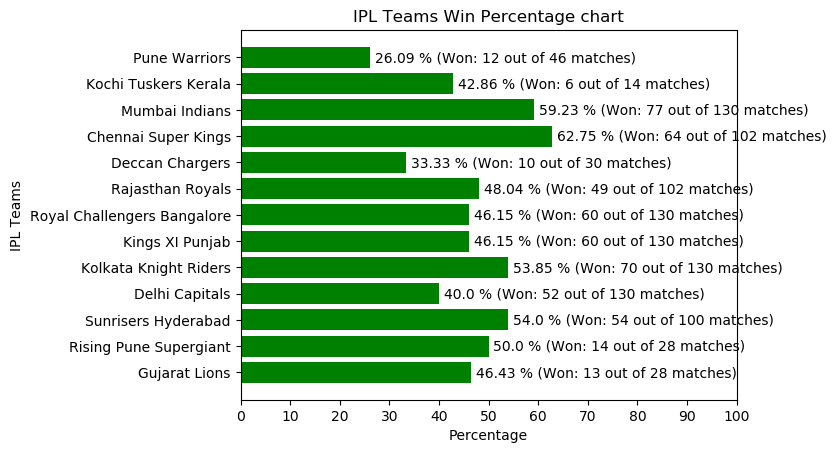

In [9]:
# 3rd snippet
# visualization
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('default')
style.use('seaborn-poster')

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
team = win_percent.keys()
wins = win_percent.values()
loses = lose_percent.values()
ties = tie_percent.values()
team_tuple = tuple(team)
win_tuple = tuple(wins)
lose_tuple = tuple(loses)
tie_tuple = tuple(ties)
print(team_tuple)
print(win_tuple)
print(lose_tuple)

y_pos = np.arange(len(team_tuple))

ax.barh(y_pos, win_tuple, color="green")
ax.set_yticks(y_pos)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(team_tuple)
for i, v in enumerate(win_tuple):
    ax.text(v + 1, i + 0.17, str(v)+' % (Won: ' + str(total_info_dict[team_tuple[i]][1]) + ' out of ' + str(total_info_dict[team_tuple[i]][0]) + ' matches)', color='black')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_ylabel('IPL Teams')
ax.set_title('IPL Teams Win Percentage chart')

plt.show()

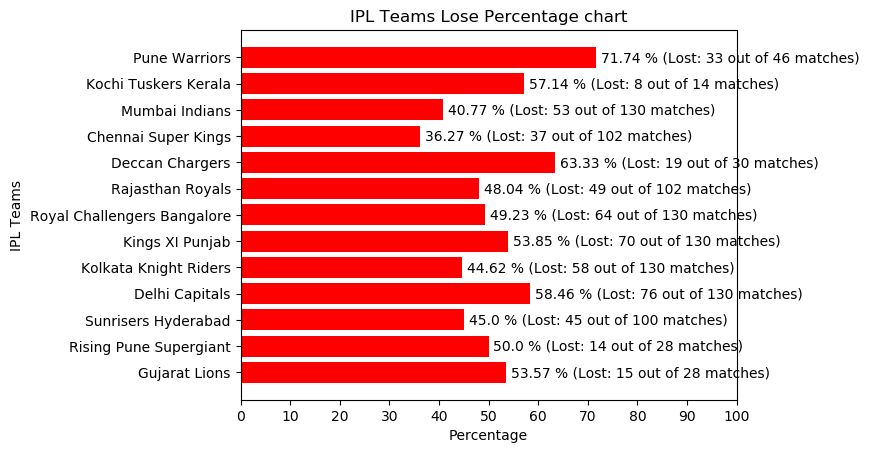

In [10]:
# 4th snippet
# IPL Teams lose Percentage chart
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('default')
style.use('seaborn-poster')

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, lose_tuple, color="red")
ax.set_yticks(y_pos)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(team_tuple)
for i, v in enumerate(lose_tuple):
    ax.text(v + 1, i + 0.17, str(v)+' % (Lost: ' + str(total_info_dict[team_tuple[i]][2]) + ' out of ' + str(total_info_dict[team_tuple[i]][0]) + ' matches)', color='black')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_ylabel('IPL Teams')
ax.set_title('IPL Teams Lose Percentage chart')

plt.show()

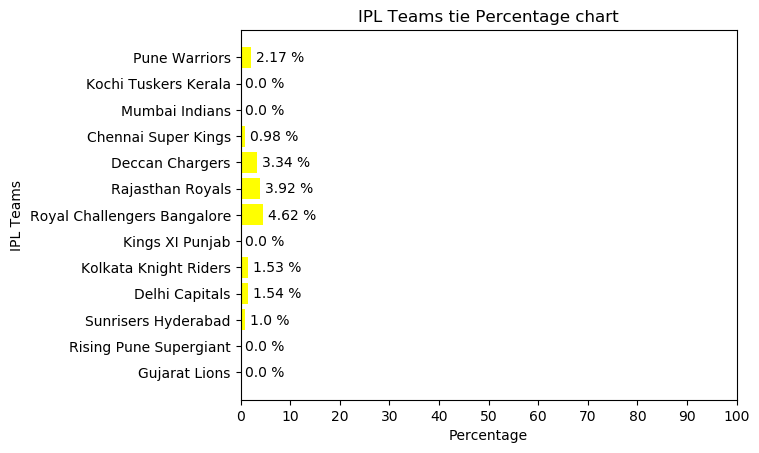

In [11]:
# 5th snippet
# IPL Teams tie Percentage chart
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style
style.use('default')
style.use('seaborn-poster')

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, tie_tuple, color="yellow")
ax.set_yticks(y_pos)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(team_tuple)
for i, v in enumerate(tie_tuple):
    ax.text(v + 1, i + 0.17, str(v)+' %', color='black')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percentage')
ax.set_ylabel('IPL Teams')
ax.set_title('IPL Teams tie Percentage chart')

plt.show()

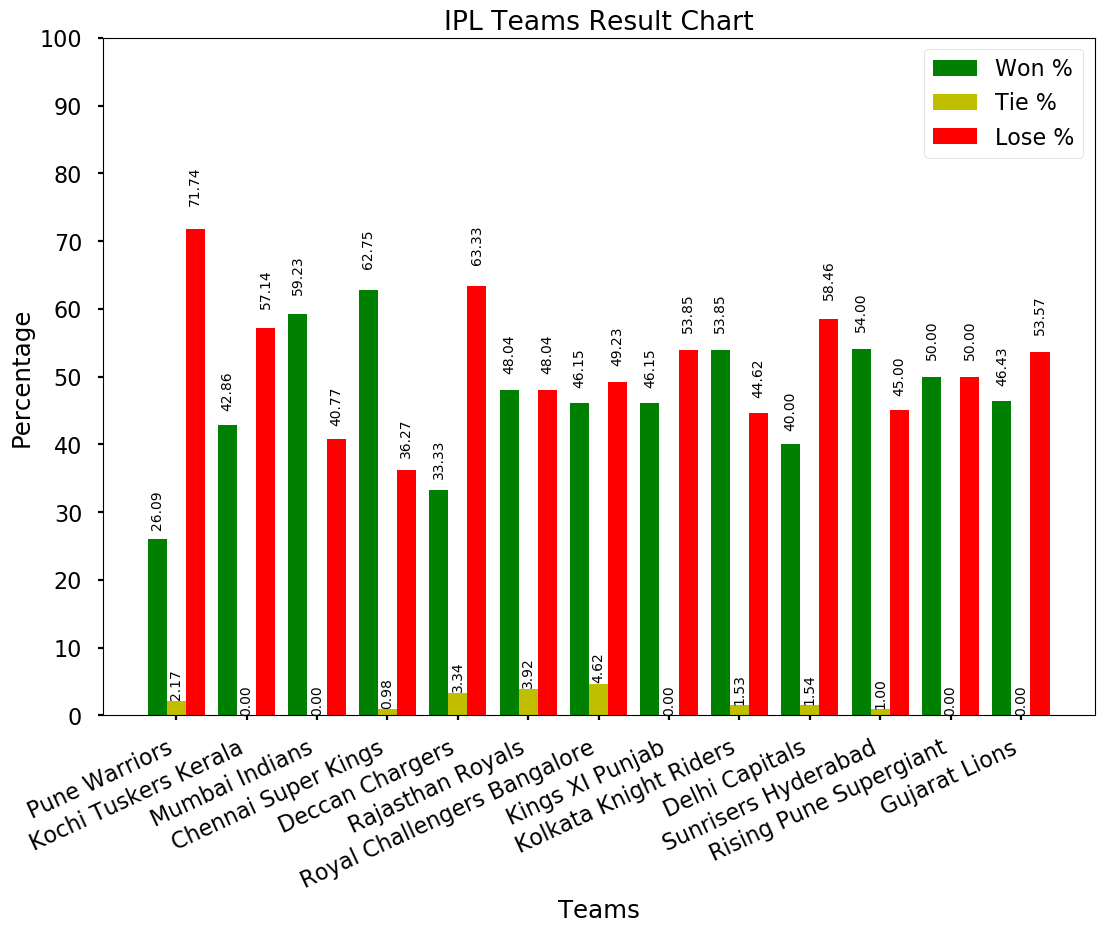

In [12]:
# 6th snippet
# Final result chart: Three results in one chart
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('default')
style.use('seaborn-poster')

N = len(team_tuple)
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, win_tuple, width, color='g')
rects2 = ax.bar(ind+width, tie_tuple, width, color='y')
rects3 = ax.bar(ind+width*2, lose_tuple, width, color='r')


ax.set_ylabel('Percentage')
ax.set_xlabel('Teams')
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_xticks(ind+width)
ax.set_xticklabels(team_tuple, rotation=25, ha='right', va='top')
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Won %', 'Tie %', 'Lose %') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, 1.05*h, '%.2f'%(h),
                ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.title('IPL Teams Result Chart')
plt.show()